In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.fft as fft

In [96]:
def plot_filter(filter_taps, fs):
    w,h = sig.freqz(filter_taps, fs=fs)
    plt.figure()
    plt.plot(w,20*np.log10(np.abs(h)**2))
    plt.xlabel('$f [Hz]$')
    plt.ylabel(r'$\left|\tilde{H}\left(f\right)\right|^{2}$')
    plt.show()

In [2]:
seed = 123
rng = np.random.default_rng(seed)

In [18]:
N = 10000
A = 1
fs = int(5e6)
t_axis = np.arange(N)/fs

In [19]:
n_t = rng.uniform(-A,A,N) + 1j*rng.uniform(-A,A,N)

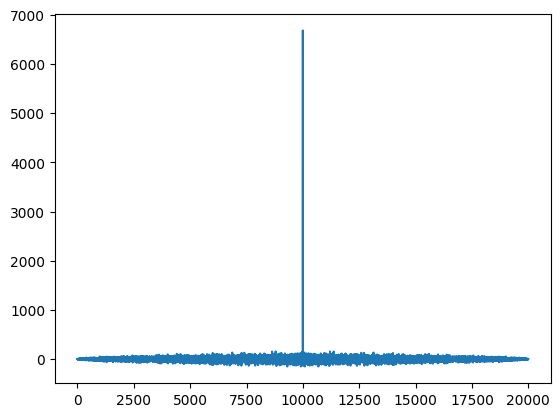

In [17]:
plt.figure()
plt.plot(sig.correlate(n_t,n_t))

(array([1.00837040e-07, 9.86175111e-08, 8.08284524e-08, ...,
        1.02094736e-07, 8.95599215e-08, 1.81016842e-07]),
 array([-2500000.    , -2495117.1875, -2490234.375 , ...,  2485351.5625,
         2490234.375 ,  2495117.1875]))

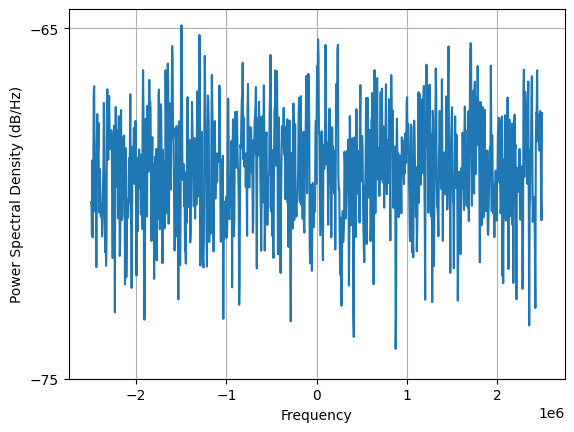

In [20]:
plt.figure()
plt.psd(n_t, NFFT=1024, Fs=fs,sides="twosided")

In [116]:
fs = 5e6
f_nyq = fs/2
ripple_db = 60
trans_width = 100e3/f_nyq
cutoff_f = 0.5e6/f_nyq
N,beta = sig.kaiserord(ripple_db,trans_width)
filter_taps = sig.firwin(N, cutoff=cutoff_f, window=('kaiser', beta))
print(N)

183


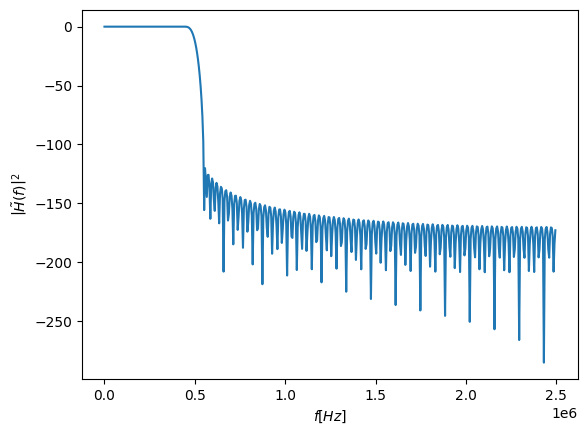

In [117]:
plot_filter(filter_taps, fs)

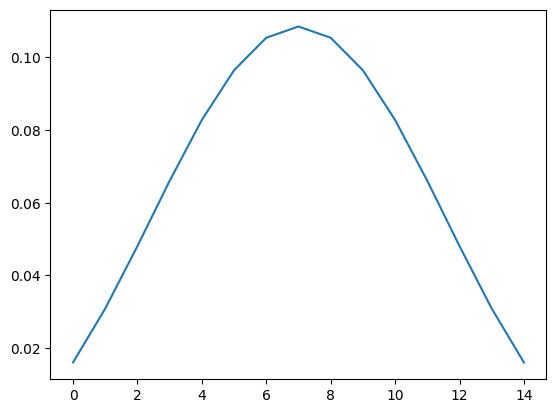

In [83]:
plt.figure()
plt.plot(filter_taps)

In [84]:
n_filtered = sig.convolve(n_t, filter_taps, mode='same')

(array([8.92297934e-12, 8.70954554e-12, 7.07713215e-12, ...,
        8.82986583e-12, 7.86874048e-12, 1.59890963e-11]),
 array([-2500000.    , -2495117.1875, -2490234.375 , ...,  2485351.5625,
         2490234.375 ,  2495117.1875]))

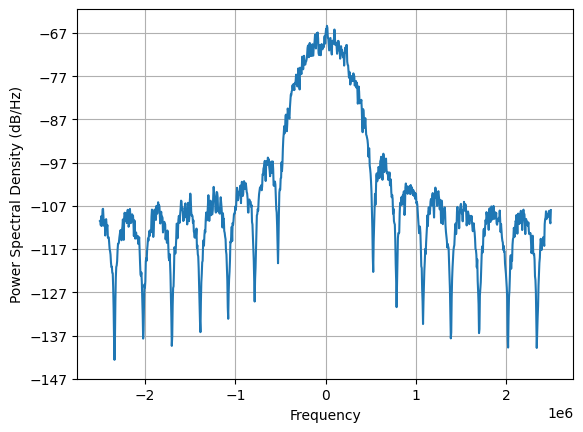

In [85]:
plt.figure()
plt.psd(n_filtered, NFFT=1024, Fs=fs,sides="twosided")

(array([  2.,   0.,   3.,   1.,   2.,   2.,   2.,   2.,   4.,   6.,   4.,
          3.,  12.,  14.,  14.,  12.,  11.,  23.,  15.,  27.,  24.,  41.,
         39.,  49.,  41.,  44.,  43.,  60.,  63.,  80.,  90.,  88., 114.,
        135., 136., 152., 188., 156., 152., 170., 196., 198., 173., 212.,
        220., 207., 210., 217., 202., 230., 244., 238., 255., 246., 273.,
        256., 252., 255., 253., 232., 256., 266., 235., 229., 184., 217.,
        191., 179., 153., 172., 166., 127., 110., 114.,  97.,  95.,  74.,
         65.,  80.,  47.,  52.,  46.,  36.,  35.,  29.,  24.,  25.,  22.,
         10.,  12.,  11.,   8.,   4.,   6.,   9.,   9.,   7.,   1.,   2.,
          2.]),
 array([-0.58639829, -0.57539485, -0.56439141, -0.55338797, -0.54238453,
        -0.5313811 , -0.52037766, -0.50937422, -0.49837078, -0.48736734,
        -0.47636391, -0.46536047, -0.45435703, -0.44335359, -0.43235015,
        -0.42134672, -0.41034328, -0.39933984, -0.3883364 , -0.37733296,
        -0.36632953, -0.35

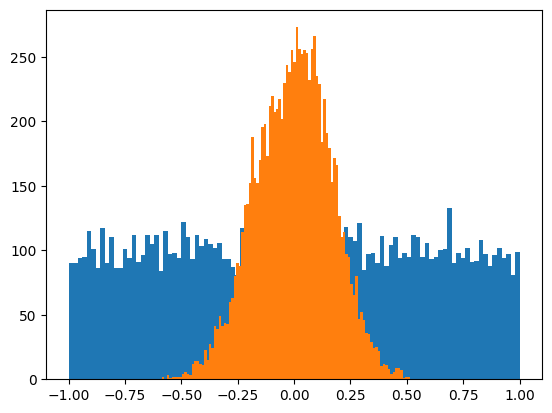

In [88]:
plt.figure()
plt.hist(n_t.real, bins=100)
plt.hist(n_filtered.real, bins=100)

In [91]:
def papr(x):
    x = np.abs(x)
    return x.max()/np.sqrt(np.mean(np.abs(x)**2))

In [92]:
papr(n_t), papr(n_filtered)

(np.float64(1.7257790643630455), np.float64(2.6666466581381565))